# <ins>Finall Project - Part 2</ins> 

## <ins>Task definition</ins> 

Regression task - Predict Car Selling Price

## <ins>General information about the dataset</ins>  

This dataset contains information about used cars listed on www.cardekho.com and published on Kaggle.

The columns in the given dataset is as follows:

- Car_Name
- Year (of manufacture)
- Selling_Price
- Present_Price
- Kms_Driven
- Fuel_Type
- Seller_Type
- Transmission
- Owner

### Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import nltk
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

from matplotlib import pyplot as plt
from IPython.display import display

Instructions for updating:
non-resource variables are not supported in the long term


## <ins>Basic familiarity with the Dataset</ins>

In [2]:
df = pd.read_csv('C:/Users/moria/Desktop/project/Project-Car/Data/car data.csv')
df.rename(columns={'Owner':'Past_Owners'}, inplace=True)
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Past_Owners
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [3]:
df.describe(include='all')

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Past_Owners
count,301,301.000000,301.000000,301.000000,301.000000,301,301,301,301.000000
unique,98,NaN,NaN,NaN,NaN,3,2,2,NaN
top,city,NaN,NaN,NaN,NaN,Petrol,Dealer,Manual,NaN
freq,26,NaN,NaN,NaN,NaN,239,195,261,NaN
mean,NaN,2013.627907,4.661296,7.628472,36947.205980,NaN,NaN,NaN,0.043189
std,NaN,2.891554,5.082812,8.644115,38886.883882,NaN,NaN,NaN,0.247915
min,NaN,2003.000000,0.100000,0.320000,500.000000,NaN,NaN,NaN,0.000000
25%,NaN,2012.000000,0.900000,1.200000,15000.000000,NaN,NaN,NaN,0.000000
50%,NaN,2014.000000,3.600000,6.400000,32000.000000,NaN,NaN,NaN,0.000000
75%,NaN,2016.000000,6.000000,9.900000,48767.000000,NaN,NaN,NaN,0.000000


## <ins>Clean and prepare the data</ins>  

In [4]:
# save for later use

df_copy = df.copy()

first of all, I will use "get_dummies" function to "convert" every categorial attribute.

In [5]:
df = pd.get_dummies(df, columns=['Fuel_Type', 'Seller_Type', 'Transmission'])
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Past_Owners,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
0,ritz,2014,3.35,5.59,27000,0,0,0,1,1,0,0,1
1,sx4,2013,4.75,9.54,43000,0,0,1,0,1,0,0,1
2,ciaz,2017,7.25,9.85,6900,0,0,0,1,1,0,0,1
3,wagon r,2011,2.85,4.15,5200,0,0,0,1,1,0,0,1
4,swift,2014,4.60,6.87,42450,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,0,0,1,0,1,0,0,1
297,brio,2015,4.00,5.90,60000,0,0,0,1,1,0,0,1
298,city,2009,3.35,11.00,87934,0,0,0,1,1,0,0,1
299,city,2017,11.50,12.50,9000,0,0,1,0,1,0,0,1


The year coulmn is not generalize, so I will generate it to Age. this is a better information.

In [6]:
df['Car_Age']= 2022-df['Year'] 

I will drop the names and year columns.
It is true that in theory the names can give us a good information, but we have only 300 rows and 98 uniqe names, so, not in this case.

In [7]:
df.drop(columns=['Car_Name'], inplace=True)
df.drop(columns=['Year'], inplace=True)

In [8]:
pd.DataFrame(data={'features': df.columns})

,features
0,Selling_Price
1,Present_Price
2,Kms_Driven
3,Past_Owners
4,Fuel_Type_CNG
5,Fuel_Type_Diesel
6,Fuel_Type_Petrol
7,Seller_Type_Dealer
8,Seller_Type_Individual
9,Transmission_Automatic


<br>

## <ins>Dig into the DATA - correlations and patterns</ins>

although linear correlations are not the only correlations we can find, it can gives us a good start. I will use Pearson’s correlation coefficient in the next matrixes.

### Correlation Matrix:

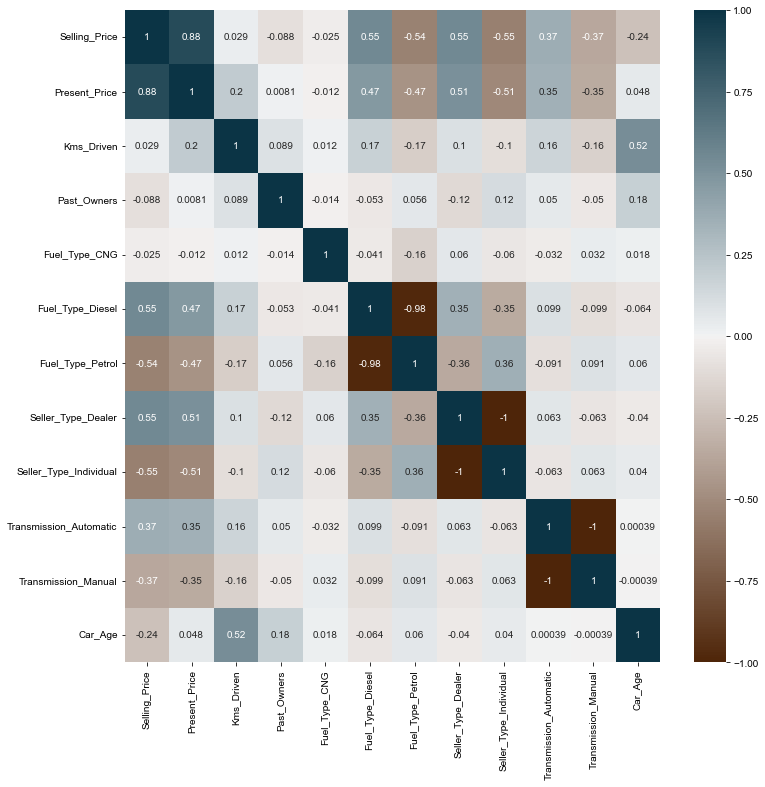

In [9]:
cmap = sns.diverging_palette(30, 230, 90, 20, as_cmap=True)
fig, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(df.corr(), annot=True, cmap=cmap)
sns.set(font_scale=1)

## <ins>Select a Performance Measure</ins>

To performance measurements I'll use MSE.

## <ins>Test Set and Train Test + Scaling</ins>

In [10]:
def split_train_test(df):
    
    # Shuffle your dataset 
    shuffle_df = df.sample(frac=1)

    # Define a size for your train set --> 70%
    train_size = int(0.7 * len(df))

    # Split your dataset 
    train = shuffle_df[:train_size]
    test = shuffle_df[train_size:]
    
    # split train and test to X and y
    X_train = train.drop(columns=['Selling_Price'], axis=1).values
    X_test = test.drop(columns=['Selling_Price'], axis=1).values
    
    y_train = train['Selling_Price'].values
    y_test = test['Selling_Price'].values
    
    return X_train, X_test, y_train[:,np.newaxis], y_test[:,np.newaxis]

In [11]:
def normalize_data(df):
    df = (df-df.min())/(df.max()-df.min())
    return df

Split data to train and test

In [12]:
_X_train, _X_test, _y_train, _y_test = split_train_test(df)

### Normalize data

In [13]:
X_train = normalize_data(_X_train)
X_test = normalize_data(_X_test)
y_train = normalize_data(_y_train)
y_test = normalize_data(_y_test) 

In [14]:
print("Data shape:\n")
print('X_Train shape:', X_train.shape, '\nY_Train shape:', y_train.shape,'\n')
print('X_Test shape:', X_test.shape, '\nY_Test shape:', y_test.shape)

Data shape:

X_Train shape: (210, 11) 
Y_Train shape: (210, 1) 

X_Test shape: (91, 11) 
Y_Test shape: (91, 1)


# <ins>Linear Regression with Tensorflow</ins>

In [15]:
# Set parameters
features = X_train.shape[1]
classes = y_train.shape[1]

lr = 0.0001
epochs = 500

# tf Graph Input
X = tf.placeholder(tf.float64, [None, features])
Y = tf.placeholder(tf.float64, [None, classes])

# Set model weights and bias
W = tf.Variable(tf.zeros([features, classes], dtype=tf.dtypes.float64, name="weight"))
b = tf.Variable(tf.zeros([classes],dtype=tf.dtypes.float64, name="bias"))

pred = tf.add(tf.matmul(X,W), b)

# Set functions
loss = tf.reduce_mean(tf.pow(pred-Y, 2)/2*X_train.shape[0])
update = tf.train.GradientDescentOptimizer(lr).minimize(loss)

In [16]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for i in range(epochs):

        sess.run(update, feed_dict= {X: X_train, Y: y_train})

        if (i + 1) % int(epochs/10) == 0:

            c = sess.run(loss, feed_dict={X:X_train, Y:y_train})
            print("Epoch:", (i + 1), "Loss=", "{:.9f}".format(c))

    print("\nOptimization Finished!\n")

    Y_pred = sess.run(pred, feed_dict={X:X_test})
    mse = tf.reduce_mean(tf.square(Y_pred - y_test))
    
    print("MSE:", "{:.9f}".format(sess.run(mse)))

Epoch: 50 Loss= 4.016051838
Epoch: 100 Loss= 3.686673592
Epoch: 150 Loss= 3.648075906
Epoch: 200 Loss= 3.642232675
Epoch: 250 Loss= 3.640124765
Epoch: 300 Loss= 3.638486936
Epoch: 350 Loss= 3.636950260
Epoch: 400 Loss= 3.635471582
Epoch: 450 Loss= 3.634044443
Epoch: 500 Loss= 3.632666564

Optimization Finished!

MSE: 0.033954458


In [17]:
print("Define normalize variables:\n",
      "\nMin:", "{:.3f}".format(y_test.min()),
      "\nMax:", "{:.3f}".format(y_test.max()),
      "\nStd:", "{:.3f}".format(y_test.std()),
      "\nMean:", "{:.3f}".format(y_test.mean()))

Define normalize variables:
 
Min: 0.000 
Max: 1.000 
Std: 0.183 
Mean: 0.164


#### Create Normalize Table from Linear Regression

In [18]:
table_norm = pd.DataFrame({'Real value':np.squeeze(y_test),
                           'Predict value':np.squeeze(Y_pred),
                           'Difference':(np.squeeze(Y_pred)-np.squeeze(y_test))})
table_norm

,Real value,Predict value,Difference
0,0.484241,0.167885,-0.316356
1,0.025788,0.172243,0.146455
2,0.942693,0.167573,-0.775120
3,0.412607,0.177144,-0.235463
4,0.068768,0.172103,0.103335
...,...,...,...
86,0.512894,0.168611,-0.344283
87,0.569914,0.171609,-0.398305
88,0.085960,0.172813,0.086853
89,0.123209,0.170802,0.047593


In [19]:
# Calculate success rate - by norm variables

count = 0

for i in (table_norm["Difference"]):
    
    if np.abs(i) <= y_test.std():
        count += 1
        
    accuracy_lr = (count/X_test.shape[0])*100
    
print("For STD:", "{:.3f}".format(y_test.std()),
      "\nSum of good prediction:", count, "from total testing predict:", y_test.shape[0],
      "\nSuccess rate:", "{:.3f}".format(accuracy_lr), "%")

For STD: 0.183 
Sum of good prediction: 79 from total testing predict: 91 
Success rate: 86.813 %


## <ins>Neural network</ins>

In [20]:
x = tf.placeholder(tf.float32, [None, features])
y = tf.placeholder(tf.float32, [None, classes])

# Layer 1
layer_1 = 16
W1 = tf.Variable(tf.truncated_normal([features, layer_1], stddev=0.1))
b1 = tf.Variable(tf.constant(0.1, shape=[layer_1]))
z1 = tf.add(tf.matmul(x, W1), b1)
a1 = tf.nn.relu(z1)

# Layer 2
layer_2 = 24
W2 = tf.Variable(tf.truncated_normal([layer_1, layer_2], stddev=0.1))
b2 = tf.Variable(tf.constant(0.1, shape=[layer_2]))
z2 = tf.add(tf.matmul(a1, W2), b2)
a2 = tf.nn.relu(z2)

# Output layer       
W3 = tf.Variable(tf.truncated_normal([layer_2, classes], stddev=0.1))
b3 = tf.Variable(tf.constant(0.1, shape=[classes]))
pred = tf.add(tf.matmul(z2, W3), b3)

# loss function
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y * tf.log(pred), reduction_indices=[1]))

# update
train_step = tf.train.GradientDescentOptimizer(lr).minimize(cross_entropy)

In [21]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for i in range(epochs):            
        sess.run(train_step, feed_dict={x: X_train, y: y_train})
        
        if (i + 1) % int(epochs/10) == 0:
            
            c = sess.run(cross_entropy, feed_dict={x: X_train, y: y_train})
            print("Epoch:", (i+1), "Loss=", "{:.9f}".format(c))
            
    print("\nOptimization Finished!\n")
    
    y_pred = sess.run(pred, feed_dict={x: X_test})
    mse_ = tf.reduce_mean(tf.square(y_pred - y_test))
    
    print("MSE:", "{:.9f}".format(sess.run(mse_)))

Epoch: 50 Loss= 0.433054537
Epoch: 100 Loss= 0.405668825
Epoch: 150 Loss= 0.384818971
Epoch: 200 Loss= 0.367976129
Epoch: 250 Loss= 0.353843838
Epoch: 300 Loss= 0.341668189
Epoch: 350 Loss= 0.330971748
Epoch: 400 Loss= 0.321432829
Epoch: 450 Loss= 0.312824607
Epoch: 500 Loss= 0.304981023

Optimization Finished!

MSE: 0.033829243


#### Create Normalize Table from Neural Network

In [22]:
table_norm_nn = pd.DataFrame({'Real value':np.squeeze(y_test),
                              'Predict value':np.squeeze(y_pred),
                              'Difference':(np.squeeze(y_test)-np.squeeze(y_pred))})
table_norm_nn

,Real value,Predict value,Difference
0,0.484241,0.174408,0.309833
1,0.025788,0.175643,-0.149855
2,0.942693,0.174320,0.768374
3,0.412607,0.177033,0.235574
4,0.068768,0.175604,-0.106836
...,...,...,...
86,0.512894,0.174614,0.338280
87,0.569914,0.175464,0.394450
88,0.085960,0.175805,-0.089845
89,0.123209,0.175235,-0.052026


In [23]:
# Calculate success rate - by norm variables

count = 0

for i in (table_norm_nn["Difference"]):
    
    if np.abs(i) <= y_test.std():
        count += 1
    
    accuracy_nn = (count/X_test.shape[0])*100
    
print("For STD:", "{:.3f}".format(y_test.std()),
      "\nSum of good prediction:", count, "from total testing predict:", y_test.shape[0],
      "\nSuccess rate:", "{:.3f}".format(accuracy_nn), "%")

For STD: 0.183 
Sum of good prediction: 81 from total testing predict: 91 
Success rate: 89.011 %


# <ins>compare between Linear Regression and Neural network</ins>

|  | Linear Regression | NN 
| --- | --- | --- |
| MSE | 0.033954458 | 0.033829243
| Accuracy | 86.813 % | 89.011 %


As we can see the Neuron Network got a better result then the simply Linear Regression.